In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("ipl.csv")

In [3]:
df.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
df.shape

(76014, 15)

In [6]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [7]:
# remove unwanted columns
# keeping only consistent teams
# removing the first 5 overs data in every match
# conve date col into datetime obj

In [8]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [9]:
# remove unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove,axis=1,inplace=True)

In [10]:
df.shape

(76014, 9)

In [11]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
# keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [13]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]


In [14]:
df.shape

(53811, 9)

In [15]:
df["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [16]:
# removing the first 5 overs data in every match
df=df[df['overs']>5.0]

In [17]:
df.shape

(40088, 9)

In [18]:
# conve date col into datetime obj
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40088 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40088 non-null  datetime64[ns]
 1   bat_team        40088 non-null  object        
 2   bowl_team       40088 non-null  object        
 3   runs            40088 non-null  int64         
 4   wickets         40088 non-null  int64         
 5   overs           40088 non-null  float64       
 6   runs_last_5     40088 non-null  int64         
 7   wickets_last_5  40088 non-null  int64         
 8   total           40088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

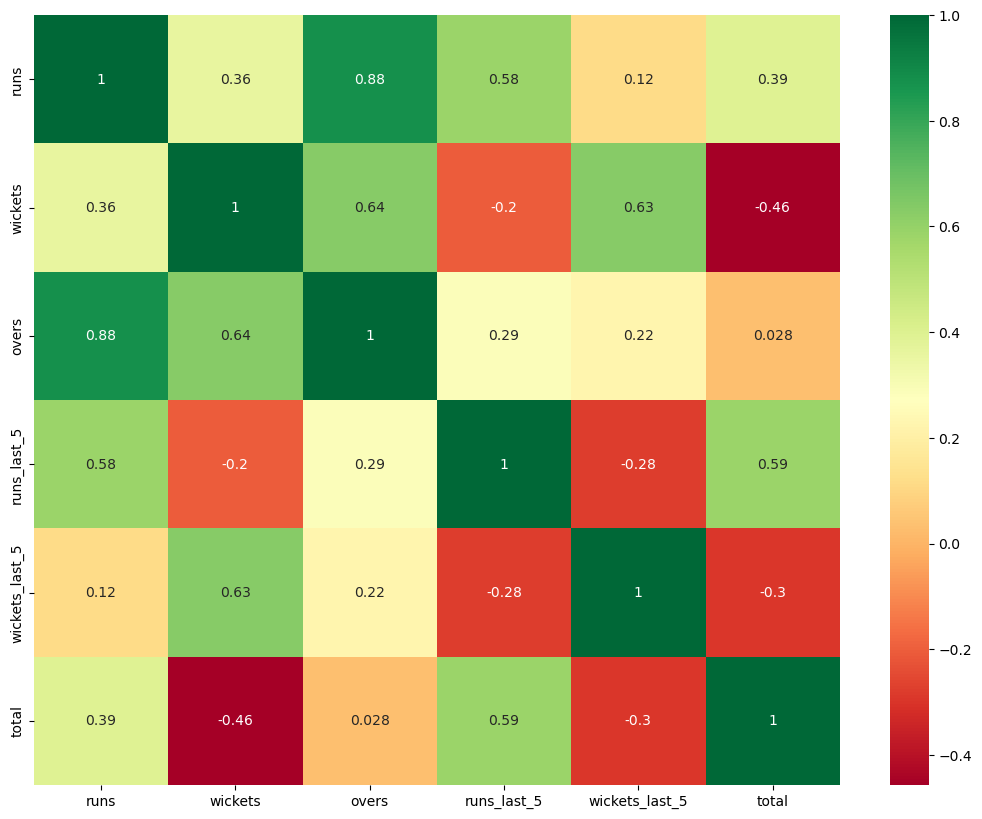

In [21]:
# Create a dataframe with only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Get correlation of all the features of the dataset
corr_matrix = df_numeric.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df_numeric[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [22]:
#Data preprocessing
# Handling categorical(object) features
# Splitting dataset into train and test set on the basis of date

In [23]:
# to convert caterigerical featuers into numerical featuers we use one hot encoding technique

In [24]:
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [25]:
encoded_df.head(5)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [26]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [27]:
# spliting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [28]:
X_train.shape

(37310, 21)

In [29]:
X_test.shape

(2778, 21)

In [30]:
#Modeling building

#Applying These Machine learning (supervised learning) Algorithm:-
#   linear regression
#   Decision Tree Regression
#   Random forest regression

In [31]:
#Appling linear regression algorithm
from sklearn.linear_model import LinearRegression
linear_regressor= LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred_lr=linear_regressor.predict(X_test)

In [33]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
y_pred_dt = decision_regressor.predict(X_test)

In [35]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
y_pred_rf = random_regressor.predict(X_test)

In [37]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

In [43]:
final_score = predict_score(batting_team='Chennai Super Kings', bowling_team='Royal Challengers Bangalore', overs=9.5, runs=100, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 182 to 197


C:\Users\kamal\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
